<a href="https://colab.research.google.com/github/sanket-ghodake/handwritten-character-recognition/blob/main/colab_notebooks/MNIST_EMNIST_IAM_Own_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multi-Class Classification



## Import

In [ ]:
#Run on TensorFlow 2.x
%tensorflow_version 2.x
from __future__ import absolute_import, division, print_function, unicode_literals

In [ ]:
!pip install tensorflow-datasets==4.3 # https://stackoverflow.com/questions/65684487/valueerror-not-enough-values-to-unpack-in-tfds-load#:~:text=pip%20install%20tensorflow%2Ddatasets%3D4.3 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.9 MB 5.2 MB/s 
  Attempting uninstall: tensorflow-datasets
    Found existing installation: tensorflow-datasets 4.0.1
    Uninstalling tensorflow-datasets-4.0.1:
      Successfully uninstalled tensorflow-datasets-4.0.1


In [ ]:
#Import relevant modules
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.python.keras import layers # https://github.com/tensorflow/tensorflow/issues/26813 
from matplotlib import pyplot as plt
import os
import datetime
import tensorflow_datasets as tfds

# The following lines adjust the granularity of reporting. 
pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format

# The following line improves formatting when ouputting NumPy arrays.
np.set_printoptions(linewidth = 200)

## Load the dataset



Image Size

In [ ]:
IMG_SIZE = 28

### To selct only some classes from datasets

In [ ]:
# Dont run this cell
import cv2
x=[]
y=[]
for i,img in enumerate(a):
  img=cv2.rotate(img, cv2.ROTATE_90_COUNTERCLOCKWISE)
  if b[i]>6:
    x.append(img)
    y.append(b[i])

x=np.array(x)
y=np.array(y)

### MNIST

#### Numpy

In [ ]:
(x_train_mnist, y_train_mnist),(x_test_mnist, y_test_mnist) = tf.keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


9


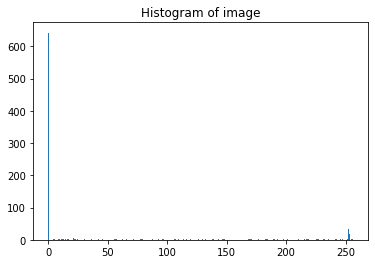

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(x_train_mnist[4])
print(y_train_mnist[4])
cv2_imshow(x_train_mnist[4])
plt.hist(x_train_mnist[4].ravel(),256,[0,256]); plt.title("Histogram of image"); # change value accordingly

In [ ]:
print("x_train_mnist, y_train_mnist")
print("Type:",type(x_train_mnist),type(y_train_mnist))
print("Dimension:",x_train_mnist.shape,y_train_mnist.shape)

x_train_mnist, y_train_mnist
Type: <class 'numpy.ndarray'> <class 'numpy.ndarray'>
Dimension: (60000, 28, 28) (60000,)


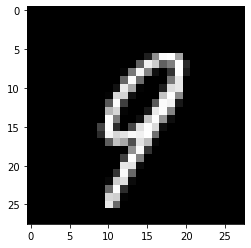

In [ ]:
plt.imshow(x_train_mnist[22],cmap='gray')

#### TFDS

https://www.tensorflow.org/datasets/api_docs/python/tfds/load 

https://stackoverflow.com/questions/50737192/tf-data-dataset-how-to-get-the-dataset-size-number-of-elements-in-a-epoch#:~:text=dataset.cardinality().numpy()

https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/images/data_augmentation.ipynb 


In [ ]:
(train_ds_mnist, val_ds_mnist, test_ds_mnist), ds_info = tfds.load(
    'mnist',
    split=['train[:80%]', 'train[80%:]', 'test'],
    with_info=True,
    as_supervised=True,
) 

In [ ]:
print("train_ds_mnist, val_ds_mnist, test_ds_mnist")
print("Type:",type(train_ds_mnist),type(val_ds_mnist),type(test_ds_mnist))
# shape = train_ds.cardinality().numpy() # https://stackoverflow.com/questions/50737192/tf-data-dataset-how-to-get-the-dataset-size-number-of-elements-in-a-epoch#:~:text=dataset.cardinality().numpy()
print("Dimension:",train_ds_mnist.cardinality().numpy(),val_ds_mnist.cardinality().numpy(),test_ds_mnist.cardinality().numpy())
print("Shape of one image:",ds_info.features)

num_classes = ds_info.features['label'].num_classes
print("Number of classees:",num_classes)

train_ds_mnist, val_ds_mnist, test_ds_mnist
Type: <class 'tensorflow.python.data.ops.dataset_ops.PrefetchDataset'> <class 'tensorflow.python.data.ops.dataset_ops.PrefetchDataset'> <class 'tensorflow.python.data.ops.dataset_ops.PrefetchDataset'>
Dimension: 48000 12000 10000
Shape of one image: FeaturesDict({
    'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
    'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
})
Number of classees: 10


#### Custom mnist datasets 
Note: Class numbers remains same no updation

In [ ]:
import cv2
def threshold__img(img,threshold):
  binary = np.where(img < threshold, 0, 255).astype(np.uint8) # threshold
  return binary

def custom_dataset(a,b,class_range):
  x=[]
  y=[]
  l=class_range[0]
  r=class_range[1]
  for i,img in enumerate(a):
    img =threshold__img(img,127)
    if l<=b[i]<=r:
      x.append(img)
      y.append(b[i])

  x=np.array(x)
  y=np.array(y)

  return x,y

##### 10 classes binary images

In [ ]:
x_train_mnist,y_train_mnist= custom_dataset(x_train_mnist,y_train_mnist,(0,9))
x_test_mnist,y_test_mnist= custom_dataset(x_test_mnist,y_test_mnist,(0,9))

### EMNIST

In [ ]:
!pip install -q tfds-nightly tensorflow matplotlib
import tensorflow_datasets as tfds

     |████████████████████████████████| 4.3 MB 5.4 MB/s 
     |████████████████████████████████| 87 kB 3.9 MB/s 
     |████████████████████████████████| 462 kB 50.9 MB/s 


https://www.tensorflow.org/datasets/catalog/emnist 


> emnist (Default emnist/byclass)

> emnist/bymerge

> emnist/balanced

> emnist/letters

> emnist/digits

> emnist/mnist




In [ ]:
(x_train_emnist_balanced, y_train_emnist_balanced),(x_test_emnist_balanced, y_test_emnist_balanced) =  tfds.as_numpy(tfds.load('emnist/balanced',split = ['train', 'test'], batch_size=-1, as_supervised=True))

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/112800 [00:00<?, ? examples/s]

Shuffling emnist-train.tfrecord...:   0%|          | 0/112800 [00:00<?, ? examples/s]

Generating test examples...:   0%|          | 0/18800 [00:00<?, ? examples/s]

Shuffling emnist-test.tfrecord...:   0%|          | 0/18800 [00:00<?, ? examples/s]

Dataset emnist downloaded and prepared to /root/tensorflow_datasets/emnist/balanced/3.0.0. Subsequent calls will reuse this data.
Instructions for updating:
Use `tf.data.Dataset.get_single_element()`.


Instructions for updating:
Use `tf.data.Dataset.get_single_element()`.


In [ ]:
print("Dimension:",x_train_emnist_balanced.shape,y_train_emnist_balanced.shape)

# Reshaping by removing extra dimension as use for MNIST model
x_train_emnist_balanced=x_train_emnist_balanced[:,:, :, 0]
x_test_emnist_balanced=x_test_emnist_balanced[:,:, :, 0]

print("Dimension after:",x_train_emnist_balanced.shape,y_train_emnist_balanced.shape)
print("Dimension after:",x_test_emnist_balanced.shape,y_test_emnist_balanced.shape)

Dimension: (112800, 28, 28, 1) (112800,)
Dimension after: (112800, 28, 28) (112800,)
Dimension after: (18800, 28, 28) (18800,)


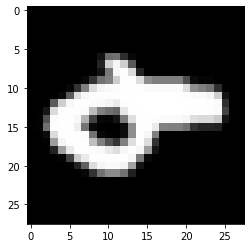

In [ ]:
plt.imshow(x_train_emnist_balanced[22],cmap='gray')

In [ ]:
# Original image after rotating and flipping

import cv2
img = x_train_emnist_balanced[200].copy()
img = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)#-
img = cv2.flip(img, 1)#-
print(y_train_emnist_balanced[200])
from google.colab.patches import cv2_imshow
cv2_imshow(img)

19


#### Custom emnist datasets 
Note: Class numbers remains same no updation

In [ ]:
import cv2

def threshold__img(img,threshold):
  binary = np.where(img < threshold, 0, 255).astype(np.uint8) # threshold
  return binary

def custom_dataset(a,b,class_range):
  x=[]
  y=[]
  l=class_range[0]
  r=class_range[1]
  for i,img in enumerate(a):
    img = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)#-
    img = cv2.flip(img, 1)#-
    img = threshold__img(img,127)
    if l<=b[i]<=r:
      x.append(img)
      y.append(b[i])

  x=np.array(x)
  y=np.array(y)

  return x,y

##### By merge classes 47 Default

In [ ]:
x_train_emnist_balanced,y_train_emnist_balanced= custom_dataset(x_train_emnist_balanced,y_train_emnist_balanced,(0,46))
x_test_emnist_balanced,y_test_emnist_balanced= custom_dataset(x_test_emnist_balanced,y_test_emnist_balanced,(0,46))

##### Only Capital Letters Dataset

In [ ]:
x_train_emnist_balanced,y_train_emnist_balanced= custom_dataset(x_train_emnist_balanced,y_train_emnist_balanced,(10,35))
x_test_emnist_balanced,y_test_emnist_balanced= custom_dataset(x_test_emnist_balanced,y_test_emnist_balanced,(10,35))

##### Only Capital Letters+ small letters balanced merged Dataset

In [ ]:
x_train_emnist_balanced,y_train_emnist_balanced= custom_dataset(x_train_emnist_balanced,y_train_emnist_balanced,(10,46))
x_test_emnist_balanced,y_test_emnist_balanced= custom_dataset(x_test_emnist_balanced,y_test_emnist_balanced,(10,46))

### IAM

In [ ]:
#TODO 

### Own dataset

Download Dataset

In [ ]:
# https://stackoverflow.com/questions/65099766/is-there-a-way-to-download-data-from-a-public-link-to-google-colab 
!gdown --id 1_yb75x8hXoTs5_f0fGdOBf0G8X4TmFZw # https://drive.google.com/file/d/1_yb75x8hXoTs5_f0fGdOBf0G8X4TmFZw/view?usp=sharing 
!gdown --id 1QBNCVYkcqvnJ8rYQA9bf840r4u27Naig # https://drive.google.com/file/d/1QBNCVYkcqvnJ8rYQA9bf840r4u27Naig/view?usp=sharing 

Downloading...
From: https://drive.google.com/uc?id=1_yb75x8hXoTs5_f0fGdOBf0G8X4TmFZw
To: /content/x_test_balanced.pickle
100% 3.89M/3.89M [00:00<00:00, 131MB/s]
Downloading...
From: https://drive.google.com/uc?id=1QBNCVYkcqvnJ8rYQA9bf840r4u27Naig
To: /content/y_test_balanced.pickle
100% 39.8k/39.8k [00:00<00:00, 42.6MB/s]


In [ ]:
# load data
import pickle
pickle_in = open("/content/x_test_balanced.pickle","rb")
X = pickle.load(pickle_in)
X = 255-X
pickle_in = open("/content/y_test_balanced.pickle","rb")
y = pickle.load(pickle_in)

print("Total dataset",type(X),X.shape) #ndarray

# https://stackoverflow.com/questions/4601373/better-way-to-shuffle-two-numpy-arrays-in-unison#:~:text=from%20sklearn.utils%20import%20shuffle%0AX%2C%20y%20%3D%20shuffle(X%2C%20y%2C%20random_state%3D0) 
from sklearn.utils import shuffle
X, y = shuffle(X, y, random_state=0)

p = int(len(X)*0.8) # Splitting into test train
x_train_own_data = X[:p]
y_train_own_data = y[:p]
x_test_own_data = X[p:]
y_test_own_data = y[p:]

print("Dimension:",x_train_own_data.shape,y_train_own_data.shape)
print("Dimension:",x_test_own_data.shape,y_test_own_data.shape)

Total dataset <class 'numpy.ndarray'> (4960, 28, 28)
Dimension: (3968, 28, 28) (3968,)
Dimension: (992, 28, 28) (992,)


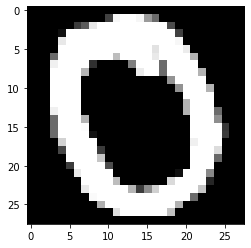

In [ ]:
plt.imshow(x_train_own_data[22],cmap='gray')

## Data Augmentation

> TODO 



MNIST 

## Model

###  Normalize feature values



In [ ]:
# x_train_normalized = x_train / 255.0
# x_test_normalized = x_test / 255.0

MNIST

In [ ]:
# TODO x_train_mnist=255-x_train_mnist

In [ ]:
x_train_mnist_normalized = x_train_mnist/255.0
x_test_mnist_normalized = x_test_mnist/255.0

EMNIST

In [ ]:
x_train_emnist_balanced_normalized = x_train_emnist_balanced/255.0
x_test_emnist_balanced_normalized = x_test_emnist_balanced/255.0

Own Data

In [ ]:
x_train_own_data_normalized = x_train_own_data/255.0
x_test_own_data_normalized = x_test_own_data/255.0

### Define a plotting function

The following function plots an accuracy curve:

In [ ]:
def plot_curve(epochs, hist, list_of_metrics):
  """Plot a curve of one or more classification metrics vs. epoch."""  
  # list_of_metrics should be one of the names shown in:
  # https://www.tensorflow.org/tutorials/structured_data/imbalanced_data#define_the_model_and_metrics  

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Value")

  for m in list_of_metrics:
    x = hist[m]
    plt.plot(epochs[1:], x[1:], label=m)

  plt.legend()

print("Loaded the plot_curve function.")

Loaded the plot_curve function.


### Create a deep neural net model



#### 2dense 1 dropout

In [ ]:
# Number of classes
classes = int(input(print("Enter no of classes:")))

Enter no of classes:
47


In [ ]:
def create_model(my_learning_rate):
  """Create and compile a deep neural net."""
  
  # All models in this course are sequential.
  model = tf.keras.models.Sequential()

  # The features are stored in a two-dimensional 28X28 array. 
  # Flatten that two-dimensional array into a a one-dimensional 
  # 784-element array.
  model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))

  # Define the first hidden layer.   
  model.add(tf.keras.layers.Dense(units=256, activation='relu'))
  model.add(tf.keras.layers.Dense(units=128, activation='relu'))
  
  # Define a dropout regularization layer. 
  model.add(tf.keras.layers.Dropout(rate=0.2))

  # Define the output layer. The units parameter is set to 10 because
  # the model must choose among 10 possible output values (representing
  # the digits from 0 to 9, inclusive).
  #
  # Don't change this layer.
  global classes
  model.add(tf.keras.layers.Dense(units=classes, activation='softmax'))     
                           
  # Construct the layers into a model that TensorFlow can execute.  
  # Notice that the loss function for multi-class classification
  # is different than the loss function for binary classification.  
  model.compile(optimizer=tf.keras.optimizers.Adam(lr=my_learning_rate),
                loss="sparse_categorical_crossentropy",
                metrics=['accuracy'])
  
  return model    


#### 6 conv 2 dense (Ex)  TODO

In [ ]:
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, BatchNormalization, Dropout
from tensorflow.keras.optimizers import SGD, Adam
from keras.regularizers import l2

def create_model(my_learning_rate):
  """Create and compile a deep neural net."""
  model = tf.keras.models.Sequential()

  model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                   activation ='relu', input_shape = (28,28,1)))
  model.add(MaxPool2D(pool_size=(1,1)))

  model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                   activation ='relu'))
  model.add(MaxPool2D(pool_size=(1,1)))
  
  model.add(Conv2D(filters = 128, kernel_size = (5,5),padding = 'Same', 
                   activation ='relu'))
  model.add(MaxPool2D(pool_size=(1,1)))

  model.add(Conv2D(filters = 256, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
  
  model.add(MaxPool2D(pool_size=(1,1)))

  model.add(Conv2D(filters = 512, kernel_size = (5,5),padding = 'valid', 
                   activation ='relu'))
  model.add(MaxPool2D(pool_size=(1,1)))
  
  model.add(Conv2D(filters = 1024, kernel_size = (5,5),padding = 'Same', 
                   activation ='relu'))
  model.add(MaxPool2D(pool_size=(1,1)))


 
  model.add(Dropout(0.20))

 
  model.add(Flatten())
  model.add(Dense(256, activation = "relu"))
  #model.add(Dropout(0.25))
  model.add(Dense(128, activation = "relu"))
  # model.add(Dropout(0.25))
  model.add(Dense(64, activation = "relu"))
  model.add(Dropout(0.20))
  model.add(Dense(47, activation = "softmax"))   
                           
  # Construct the layers into a model that TensorFlow can execute.  
  # Notice that the loss function for multi-class classification
  # is different than the loss function for binary classification.  
  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=my_learning_rate),
                loss="sparse_categorical_crossentropy",
                metrics=['accuracy'])# lr changed to learning_rate
  
  return model    


### train model 

In [ ]:

def train_model(model, train_features, train_label, epochs,
                batch_size=None, validation_split=0.1):
  """Train the model by feeding it data."""

  logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

  # https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ModelCheckpoint 
  checkpoint_filepath = '/content/checkpoint'
  model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
      filepath=checkpoint_filepath,
      save_weights_only=True,
      monitor='val_accuracy',
      mode='max',
      save_best_only=True)

  history = model.fit(x=train_features, y=train_label, batch_size=batch_size,
                      epochs=epochs, shuffle=True, 
                      validation_split=validation_split,callbacks=[tensorboard_callback,model_checkpoint_callback])
  
  # The model weights (that are considered the best) are loaded into the model.
  model.load_weights(checkpoint_filepath)

  # To track the progression of training, gather a snapshot
  # of the model's metrics at each epoch. 
  epochs = history.epoch
  hist = pd.DataFrame(history.history)

  return epochs, hist ,history

### Invoke the previous functions

Run the following code cell to invoke the preceding functions and actually train the model on the training set. 

**Note:** Due to several factors (for example, more examples and a more complex neural network) training MNIST might take longer than training the California Housing Dataset. Be patient.

In [ ]:
# For mnist only
x_train_normalized = x_train_mnist_normalized
y_train = y_train_mnist
x_test_normalized = x_test_mnist_normalized
y_test = y_test_mnist

In [ ]:
# For emnist only
x_train_normalized = x_train_emnist_balanced_normalized
y_train = y_train_emnist_balanced
x_test_normalized = x_test_emnist_balanced_normalized
y_test = y_test_emnist_balanced

In [ ]:
# For mnist +own data
# https://stackoverflow.com/questions/43561622/merge-two-numpy-arrays#:~:text=np.concatenate((first%2C%20second)%2C%20axis%3D1) 
x_train_normalized = np.concatenate((x_train_mnist_normalized, x_train_own_data_normalized), axis=0)
y_train = np.concatenate((y_train_mnist, y_train_own_data), axis=0)
x_test_normalized = np.concatenate((x_test_mnist_normalized, x_test_own_data_normalized), axis=0)
y_test = np.concatenate((y_test_mnist, y_test_own_data), axis=0)

Training

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


16/16 [==============================] - 3s 131ms/step - loss: 2.3004 - accuracy: 0.3821 - val_loss: 1.2893 - val_accuracy: 0.6398
Epoch 2/20
16/16 [==============================] - 2s 118ms/step - loss: 1.2147 - accuracy: 0.6539 - val_loss: 0.9225 - val_accuracy: 0.7398
Epoch 3/20
16/16 [==============================] - 2s 118ms/step - loss: 0.9131 - accuracy: 0.7339 - val_loss: 0.7445 - val_accuracy: 0.7860
Epoch 4/20
16/16 [==============================] - 2s 119ms/step - loss: 0.7463 - accuracy: 0.7810 - val_loss: 0.6399 - val_accuracy: 0.8120
Epoch 5/20
16/16 [==============================] - 2s 119ms/step - loss: 0.6420 - accuracy: 0.8087 - val_loss: 0.5797 - val_accuracy: 0.8255
Epoch 6/20
16/16 [==============================] - 2s 121ms/step - loss: 0.5661 - accuracy: 0.8301 - val_loss: 0.5352 - val_accuracy: 0.8382
Epoch 7/20
16/16 [==============================] - 2s 121ms/step - loss: 0.5085 - accuracy: 0.8456 - val_loss: 0.5051 - val_accuracy: 0.8450
Epoch 8/20
16/16 

[0.4682760238647461, 0.8583108186721802]

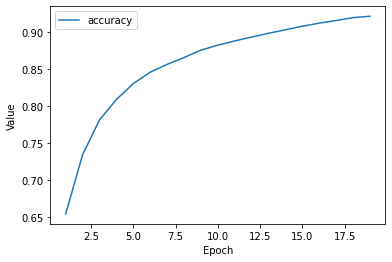

In [ ]:
# The following variables are the hyperparameters.
learning_rate = 0.004
epochs = 20
batch_size = 4000
validation_split = 0.3

# Establish the model's topography.
my_model = create_model(learning_rate)

# Train the model on the normalized training set.
epochs, hist, history = train_model(my_model, x_train_normalized, y_train, 
                           epochs, batch_size, validation_split)

# Plot a graph of the metric vs. epochs.
list_of_metrics_to_plot = ['accuracy']
plot_curve(epochs, hist, list_of_metrics_to_plot)

# Evaluate against the test set.
print("\n Evaluate the new model against the test set:")
my_model.evaluate(x=x_test_normalized, y=y_test, batch_size=batch_size)

### Learining curves

https://www.tensorflow.org/tutorials/images/transfer_learning#learning_curves 

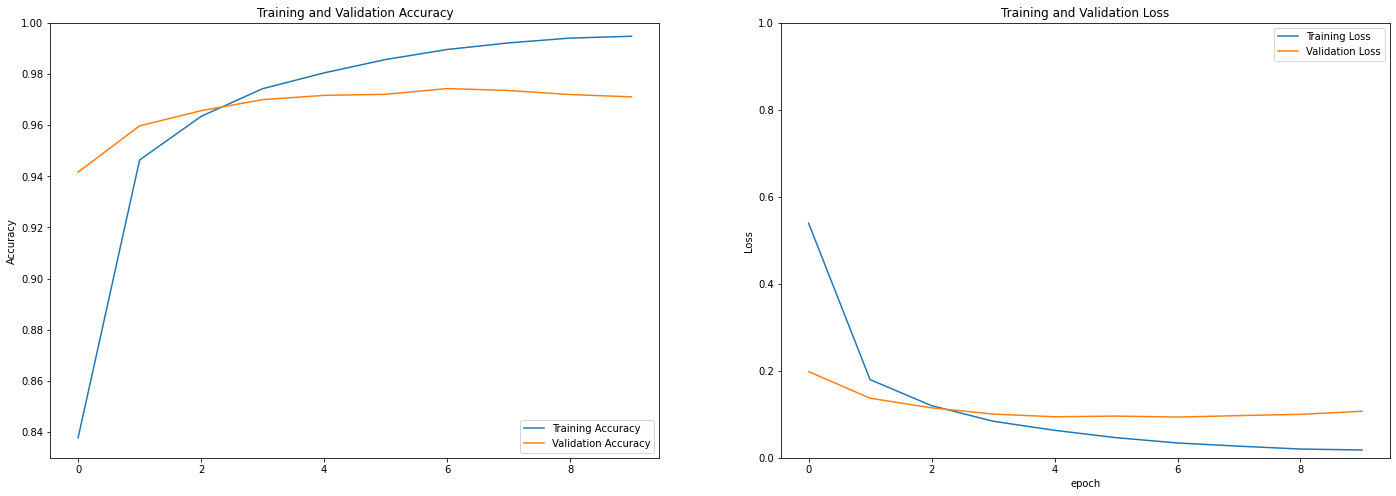

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(24, 8))
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Loss')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

## raw

In [ ]:
my_model.save('my_model.h5')

In [ ]:
new_model = tf.keras.models.load_model('my_model.h5')

# Show the model architecture
new_model.summary()

In [ ]:
import cv2
img = cv2.imread("/content/Screenshot 2022-01-20 204808.jpeg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.resize(img,(28,28))
img_final =np.reshape(img, (1,28,28,1))
m=new_model.predict([img_final])
print(m)
t=np.argmax(m[0])
print(t)
# result = np.where(t == 1.0)
# print(result)
from google.colab.patches import cv2_imshow
cv2_imshow(img)
plt.imshow(img)
plt.show()

In [ ]:
import cv2
# img = cv2.imread("/content/Screenshot 2022-01-20 194744.jpeg")
# img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# img = cv2.resize(img,(28,28))
# img_final =np.reshape(img, (1,28,28,1))
type(x_train[222])
img_final =np.reshape(x_train[222], (1,28,28,1))
m=new_model.predict([img_final])
print(m)
t=np.argmax(m[0])
print(t)
# result = np.where(t == 1.0)
# print(result)
from google.colab.patches import cv2_imshow
# cv2_imshow(x_train[222]])
cv2_imshow(x_train[222])
plt.imshow(x_train[222])
plt.show()